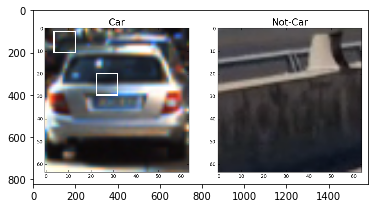

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

image = mpimg.imread('./examples/car_not_car.png')

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    draw_img = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img

bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

(array([53459, 55672, 37780, 29756, 24577, 35542, 51289, 53291, 32322,
        21928, 24886, 36616, 36357, 25165, 18248, 16380, 13840, 11849,
        13877, 13366, 16827, 17457, 13949, 15528, 20293, 22633, 21447,
        20671, 27818, 33818, 32370,  6589]),
 array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
          72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
         144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
         216.,  224.,  232.,  240.,  248.,  256.]))

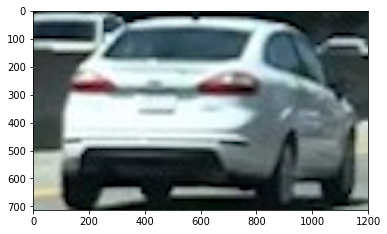

In [2]:
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('./examples/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
plt.imshow(image)
rhist

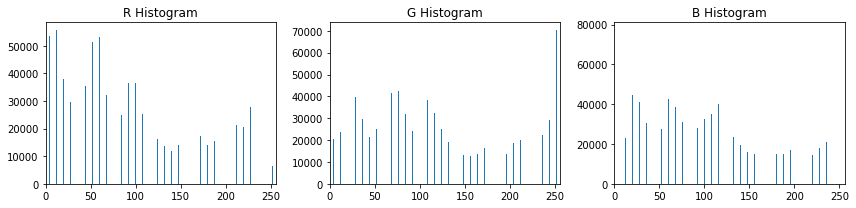

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./examples/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = channel_hist(img[:,:,0])
    ghist = channel_hist(img[:,:,1])
    bhist = channel_hist(img[:,:,2])
    # Generating bin centers
    bin_centers = calc_bin_centers(rhist[1])
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
def channel_hist(color_channel):
    return np.histogram(color_channel, bins=32, range=(0, 256))
    
def calc_bin_centers(bin_edges):
    return (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

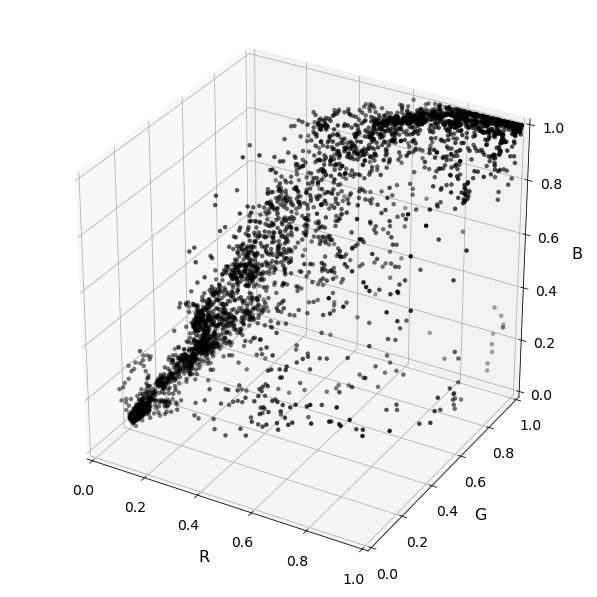

In [14]:
from util import plot3d

img = mpimg.imread('./examples/color_spaces2.png')
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
colors_rgb = img_small_RGB / 255.
plot3d(img, colors_rgb, axis_limits=[(0, 1), (0, 1), (0, 1)])